# (ADA) Homework 1: Scoring the Language Model Olympics

---

By the end of this homework, we expect you to be able to:

- Load data and handle data using pandas;
- Navigate the documentation of Python packages by yourself;
- Filter and tidy up noisy real-world datasets;
- Aggregate your data in different (and hopefully helpful) ways;
- Create meaningful visualizations to analyze the data;
- Communicate your findings in a clear and concise manner

---

**Important Dates.**

- Homework release: Fri 04 Oct 2024
- Homework due: Sat 18 Oct 2024, 23:59
- Grade release: Mon 04 Nov 2024

**Some rules**

- You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you may do so, but must justify your choice.
- Make sure you use the data folder provided in the repository in read-only mode. (Or alternatively, be sure you don’t change any of the files.)
- **Be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers.** A notebook that only has code cells will not suffice. To avoid confusion: use short comments for longer code answers.
- For questions containing the /Discuss:/ prefix, answer not with code, but with a textual explanation (in markdown).
- Back up any hypotheses and claims with data, since this is an important aspect of the course.
- Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master/main branch. If there are multiple notebooks present, we will not grade anything.
- We will not run your notebook for you! Rather, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. Thus, be sure to hand in a fully-run and evaluated notebook. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
- In continuation to the previous point, interactive plots, such as those generated using the ‘plotly’ package, should be strictly avoided! Make sure to print results and/or dataframes that confirm you have properly addressed the task.

**A Note on using Language Models (LMs)**

If you try hard enough, you will likely get away with cheating. Fortunately, our job is not to police, but rather to educate! So, please consider the following:
- Presumably, you are taking this course to learn something! LMs are not always right ([they often fail in silly ways](https://community.openai.com/t/why-9-11-is-larger-than-9-9-incredible/869824/4)). This course should prepare you to detect when they are wrong!
- Some of the TAs on this course literally published many works on detecting machine-generated text.
---

## Context

Context
AI is booming! Newspapers, influencers, and your relatives all agree that AI is important. But while almost everyone agrees that AI is the future, much is unclear about what that future looks like…

Freshly graduated from the EPFL, you are hired by the Swiss government to **advise on a large-scale “AI integration” initiative code-named **"NEUTRALITY"**** (Navigating Efficient Upgrades Through Robust Artificial Learning Integration Techniques Yearly). Convinced by the stunning progress in language modeling, the government would like to battle the growing shortages in the education sector by using LMs. Your job description: investigate which LMs might be best suited!

You are given the results of three LMs on the [“Massive Multitask Language Understanding (MMLU)”](https://arxiv.org/abs/2009.03300) dataset to compare. This famous dataset consists of 57 subjects with multiple-choice questions, covering diverse subjects like mathematics, computer science, history, and law. Most providers of state-of-the-art LMs use this dataset to showcase the versatility of their latest models. Unfortunately, Horta-Ribeiro, the intern responsible for collecting the results, didn’t take EPFL’s famous ADA course. As a result, the collected datasets are slightly corrupted.

### A very brief primer on Language Models
Language models (LMs) are sophisticated statistical models designed to understand and generate human-like text. At their core, LMs are trained to predict the most likely continuation of a given input text. For example, given the input "The cat sat on the," an LM might predict "mat" as a likely continuation.
LMs are trained on vast text samples from various sources, including books, websites, and social media. This extensive training allows them to **capture patterns and relationships in language**, enabling them to generate coherent and contextually appropriate text across a wide range of topics and styles.

While LMs can produce text that appears to be written by intelligent humans, it's important to note that their capabilities can diverge from human intelligence in unexpected ways. They may sometimes generate factually incorrect information or struggle with complex reasoning tasks.

Two key concepts in understanding LMs are:
1. **Tokens**: LMs process text using "tokens" rather than individual characters. Tokens can be words, parts of words, or punctuation marks. For example, the sentence "I love AI!" might be tokenized as ["I", "love", "AI", "!"]. **Tokenization** is the first step in both training and using an LM.
2. **Context**: The input text provided to an LM is called the "context." This context informs the model's predictions or generations. A longer or more specific context often leads to more accurate and relevant outputs.

[See: Wikipedia entry on language models](https://en.wikipedia.org/wiki/Large_language_model)

###  Files for this assignment
This assignment is divided into three tasks, each of which should bring you a step closer to providing a recommendation toward project NEUTRALITY’s objectives:

- **Task 1**: Inspecting the results and getting your first model ranking
- **Task 2**: Inspecting the underlying data used to generate the results for possible biases
- **Task 3**: Learning about tokens and providing a final recommendation


```
📁 PROJECT_NEUTRALITY
│
├── 📄 analysis.ipynb (the file you're currently reading!)
├── 📄 requirements.txt (install into your environment)
│
├── 📁 task_1
├── 📁 task_2
└── 📁 task_2.5
```   
 

In [1]:
# please make sure you install the packages listed in the requirements.txt file in your environment!
# using pip
# pip install -r requirements.txt
#
# using Conda:
# conda create --name <env_name> --file requirements.txt
#
# some basic imports

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import ttest_ind
import plot_config # personal configuration file to have nice plots

## Task 1 (18 points): What's in an average anyway?

The files needed to complete task 1 can be found in the folder "`data/task_1/`:
```
task_1/
│
├── mmlu_data/
│   └── test.csv
│
└── lm_scores/
    ├── lm_X.csv
    ├── lm_Y.csv
    └── lm_Z.csv
```

We will start by loading, (manually) inspecting, and cleaning the data. Although it doesn't seem "glamorous" (nor is it particularly fun...) - manually inspecting data is extremely important! In fact, it's one of the few things most AI and Data Science researchers agree on :). Next, we will take a first pass on ordering our Olympic podium between three LMs.

### 1.1 (1 pt)
 
Load the subfiles contained in the `mmlu_data` and `lm_scores` folders into separate dataframes:
- `df_test`
- `df_x`
- `df_y`
- `df_z`

for each, print their sizes.

In [3]:
df_test = pd.read_csv(filepath_or_buffer=f"task_1/mmlu_data/test.csv", sep=",")
df_x = pd.read_csv(filepath_or_buffer="task_1/lm_scores/lm_X.csv", sep=",")
df_y = pd.read_csv(filepath_or_buffer="task_1/lm_scores/lm_Y.csv", sep=",")
df_z = pd.read_csv(filepath_or_buffer="task_1/lm_scores/lm_Z.csv", sep=",")

# Instead of printing the size, let's print the shape to get additional information
print(f"Shape of df_test: {df_test.shape}")
print(f"Shape of df_x: {df_x.shape}")
print(f"Shape of df_y: {df_y.shape}")
print(f"Shape of df_z: {df_z.shape}")

Shape of df_test: (14042, 8)
Shape of df_x: (13882, 2)
Shape of df_y: (13978, 2)
Shape of df_z: (13923, 2)


In [4]:
# Have a look at the different DataFrames
df_test.head()

,question,A,B,C,D,answer,subject,question_id
0,Find the degree for the given field extension ...,0,4,2,6,B,abstract algebra,0
1,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",8,2,24,120,C,abstract algebra,1
2,Find all zeros in the indicated finite field o...,0,1,"0,1","0,4",D,abstract algebra,2
3,Statement 1 | A factor group of a non-Abelian ...,"True, True","False, False","True, False","False, True",B,abstract algebra,3
4,Find the product of the given polynomials in t...,2x^2 + 5,6x^2 + 4x + 6,0,x^2 + 1,B,abstract algebra,4


In [5]:
df_x.head()

,question_id,result
0,0,B
1,1,C
2,2,D
3,3,B
4,4,Answer: B


In [6]:
df_y.head()

,question_id,result
0,0,Answer: D
1,1,D
2,2,Answer: D
3,3,NaN
4,4,D


In [7]:
df_z.head()

,question_id,result
0,0,B
1,1,Answer: B
2,2,C
3,3,B
4,4,B


### 1.2 (4 pt)
Unfortunately, LMs don't always output the format we want. In the column `result`, the value should be one of A, B, C, or D. 

A. For each of the LM score dataframes, use a `value_counts()` operation and print the results. 

B. /Discuss:/ Inspect the results and describe the types of answer formats you see. Besides the "expected" case, you should be able to find at least four unexpected formats.

In [8]:
print("Results for LM X:")
df_x["result"].value_counts()

Results for LM X:


result
A                                                                                                                 2733
A                                                                                                                 1657
B                                                                                                                 1412
Answer: A                                                                                                         1398
C                                                                                                                 1134
                                                                                                                  ... 
judicial activism, so the answer is A                                                                                1
creating insurmountable obstacles to the founding of factions, so the answer is A                                    1
A congressperson who retires to take a po

In [9]:
print("Results for LM Y:")
df_y["result"].value_counts()

Results for LM Y:


result
D                                                                                                2894
Answer: D                                                                                        1718
C                                                                                                1701
B                                                                                                1240
D                                                                                                1145
                                                                                                 ... 
Where the energy of interaction between the atoms is at its minimum value, so the answer is A       1
leaves more viable offspring than others of its species., so the answer is D                        1
A and C only, so the answer is D                                                                    1
ADP + P → ATP, so the answer is D                                          

In [10]:
print("Results for LM Z:")
df_z["result"].value_counts()

Results for LM Z:


result
D                                                                                   2257
C                                                                                   2191
B                                                                                   2127
A                                                                                   2060
Answer: D                                                                            777
                                                                                    ... 
omission of a universal suffrage clause, so the answer is D                            1
declare war, so the answer is D                                                        1
state and local governments, by means of federal funding, so the answer is B           1
less clearly identified with consistent political ideologies, so the answer is B       1
Rahit, so the answer is B                                                              1
Name: count, L

**B**. From the above, we see that most responses are in the format of A, B, C, or D. However, we also see the following (more or less) unexpected formats:
- Letters with spaces, e.g., `"A "` or `"B "`
- Answers with the word "Answer: " followed by the letter, e.g., `"Answer: A"`
- Missing values, e.g., `nan`
- Responses such as `"None of the above"` or `"Not Sure"`
- Other responses are in an "un-extracted format, i.e. they contain the explanation of the LM, e.g. `"By comparing the maximum altitude of the Sun in two cities at different latitudes at the same time on the same day., so the answer is C"`. 

### 1.3 (5 pt)
Oh oh... That doesn't look great. Simply dropping all invalid answers seems overly wasteful, yet fixing all of these looks like a mess! Instead, let's focus for now on fixing just those answers of length < 10 characters that require only a single `str.replace()` operation. 

For example, if the answer looks like `--A--`, we could fix this by using the following simple function:

```
def clean_answer(s, pattern='-'):
    return str(s).replace(pattern, '')

dirty_answer = '--A--'
clean_answer = clean_answer(dirty_answer)
```

A. Filter the three score dataframes to include only answers with less than 10 characters. Make a deep copy of the dataframes as you filter them.

B. Modify the `clean_answer()` example function to clean the answers in the filtered data frames using the `apply()` functionality. Finally, make sure **all remaining answers are one of `A, B, C, or D`.**

C. /Discuss:/ Compare the sizes of the original and filtered data frames. What do you see? Why might this be a problem?

In [11]:
# Let us first filter by the length and look at what we get, 
# We will then apply the cleaning function

# Let us first drop rows with None values
df_x_filtered = df_x.copy().dropna()
df_y_filtered = df_y.copy().dropna()
df_z_filtered = df_z.copy().dropna()

# Filtering by length and dropping rows with None results
cond = "result.str.len() < 10"
df_x_filtered = df_x_filtered.query(cond)
df_y_filtered = df_y_filtered.query(cond)
df_z_filtered = df_z_filtered.query(cond)

df_x_filtered['model_name'] = 'X'
df_y_filtered['model_name'] = 'Y'
df_z_filtered['model_name'] = 'Z'
df_xyz = pd.concat([df_x_filtered, df_y_filtered, df_z_filtered])

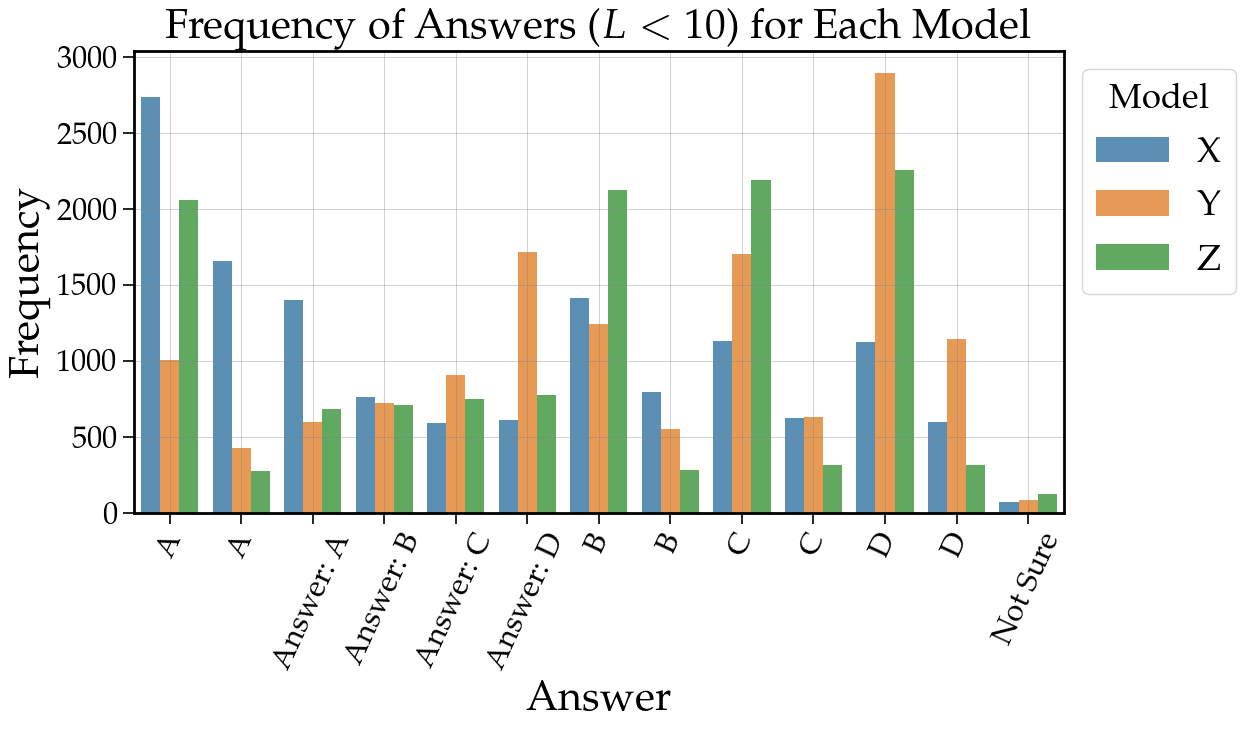

In [12]:
# Let's visualize the remaining result formats
answers = sorted(df_xyz['result'].unique())
plt.figure(figsize=(12, 6))
sns.countplot(data=df_xyz, x='result', hue='model_name', order=answers, alpha=0.8, )
plt.xlabel("Answer")
plt.ylabel("Frequency")
plt.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left', title_fontsize='25')
plt.title(f"Frequency of Answers ($L<10$) for Each Model")
plt.grid(True, alpha=0.5)
plt.xticks(rotation=65)
plt.show()

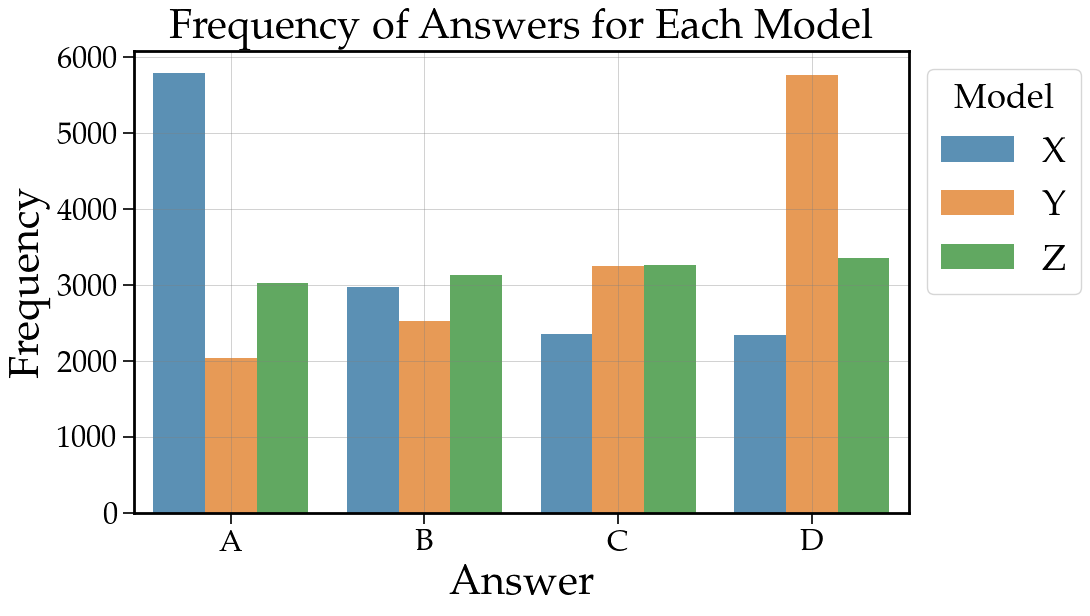

In [13]:
def clean_answer(s):
    s = str(s)
    if s in {"A", "B", "C", "D"}:
        return s
    elif "Answer:" in s:
        return s.replace("Answer: ", "").strip()
    elif "Not Sure" in s: 
        return np.nan
    elif " " in s:
        return s.replace(" ", "")

# Clean the answers 
df_x_filtered["result"] = df_x_filtered["result"].apply(clean_answer)
df_y_filtered["result"] = df_y_filtered["result"].apply(clean_answer)
df_z_filtered["result"] = df_z_filtered["result"].apply(clean_answer)

# Drop the rows with None values due to the uncertainty of the language model
df_x_filtered = df_x_filtered.dropna()
df_y_filtered = df_y_filtered.dropna()
df_z_filtered = df_z_filtered.dropna()

# Let's visualize the remaining result formats
df_xyz = pd.concat([df_x_filtered, df_y_filtered, df_z_filtered])
answers = sorted(df_xyz['result'].unique())
plt.figure(figsize=(10, 6))
sns.countplot(data=df_xyz, x='result', hue='model_name', order=answers, alpha=0.8)
plt.xlabel("Answer")
plt.ylabel("Frequency")
plt.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left', title_fontsize='25')
plt.title("Frequency of Answers for Each Model")
plt.grid(True, alpha=0.5)
plt.show()

In [14]:
# Let's compare the sizes of the original and filtered dataframes
print(f"Shape of df_x: {df_x.shape}, Shape of df_x_filtered: {df_x_filtered.shape}, Difference: {df_x.shape[0] - df_x_filtered.shape[0]}")
print(f"Shape of df_y: {df_y.shape}, Shape of df_y_filtered: {df_y_filtered.shape}, Difference: {df_y.shape[0] - df_y_filtered.shape[0]}")
print(f"Shape of df_z: {df_z.shape}, Shape of df_z_filtered: {df_z_filtered.shape}, Difference: {df_z.shape[0] - df_z_filtered.shape[0]}")

Shape of df_x: (13882, 2), Shape of df_x_filtered: (13436, 3), Difference: 446
Shape of df_y: (13978, 2), Shape of df_y_filtered: (13551, 3), Difference: 427
Shape of df_z: (13923, 2), Shape of df_z_filtered: (12753, 3), Difference: 1170


**C**. In each case, the percentage of discarded data is the following:
- LM X: $\approx 3.2\%$ 
- LM Y: $\approx 3.1\%$ 
- LM Z: $\approx 8.4\%$

For the last case, the higher percentage might indicate that the model has more difficulty in providing a short answer. This might be a problem since we are discarding a significant amount of data, which might lead to a biased analysis.

Importantly, since our goal here is to look for a great educational model, short answers might not be correlated with better performance. Indeed, most language models perform better when they use **chain-of-thought reasoning** (which requires more words). A possible trick would be to input the longer answers into another language model trained to only return the answer.  

### 1.4 (3 pt)

Now that our answer columns are nicely formatted, let's take a look at model performance:

A. Both the `MMLU` dataframes and the language model score data frames have the columns `question_id`. For each of the language model score data frames, use an inner join operation with the `df_test` dataframe on the `question_id` column.

B. Add a new column to each of the resulting dataframes called `correct`, that checks if the model's answer in `result` is the same as the expected answer in the column `answer`. Then, print the average score of each model.

In [15]:
# Merging the dataframes
df_x_comparison = pd.merge(df_x_filtered, df_test, on="question_id", how="inner")
df_y_comparison = pd.merge(df_y_filtered, df_test, on="question_id", how="inner")
df_z_comparison = pd.merge(df_z_filtered, df_test, on="question_id", how="inner")

# Creating the new "correct" column
df_x_comparison["correct"] = df_x_comparison["result"] == df_x_comparison["answer"]
df_y_comparison["correct"] = df_y_comparison["result"] == df_y_comparison["answer"]
df_z_comparison["correct"] = df_z_comparison["result"] == df_z_comparison["answer"]

In [16]:
print(f"First few rows of LM X comparison:\n {df_x_comparison[['result', 'answer', 'correct']].head()}")
print("=*==*="*8)
print(f"First few rows of LM Y comparison:\n {df_y_comparison[['result', 'answer', 'correct']].head()}")
print("=*==*="*8)
print(f"First few rows of LM Z comparison:\n {df_z_comparison[['result', 'answer', 'correct']].head()}")

First few rows of LM X comparison:
   result answer  correct
0      B      B     True
1      C      C     True
2      D      D     True
3      B      B     True
4      B      B     True
=*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*=
First few rows of LM Y comparison:
   result answer  correct
0      D      B    False
1      D      C    False
2      D      D     True
3      D      B    False
4      C      A    False
=*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*=
First few rows of LM Z comparison:
   result answer  correct
0      B      B     True
1      B      C    False
2      C      D    False
3      B      B     True
4      B      B     True


In [17]:
print(f"Average scores for each model (Accuracy):")
print(f"   - LM X: {df_x_comparison['correct'].mean() * 100:.5f}%")
print(f"   - LM Y: {df_y_comparison['correct'].mean() * 100:.5f}%")
print(f"   - LM Z: {df_z_comparison['correct'].mean() * 100:.5f}%")

Average scores for each model (Accuracy):
   - LM X: 76.74903%
   - LM Y: 74.58490%
   - LM Z: 66.32949%


### 1.5 (5 pt)

Hmmm, something doesn't seem quite right. Let's investigate how "balanced" this dataset is:

A. For each of the 57 subjects in the MMLU, compare the number of questions answered by each model. Print the subjects for which there is a more than 10% difference.

B. Propose and implement a reasonable way to rebalance the results. (e.g., while throwing away 100% of the results perfectly rebalances the results, it is not reasonable).

C. Finally, print the updated accuracy on the rebalanced data.

**hint:**:
- (A) For a given subject, let model X and model Y have answered 181 and 200 questions respectively. You can consider this a 10% difference from the perspective of X since: (200 - 181) / 181 > 0.10

In [18]:
# Let's first group by the subject and count the number of questions answered by each model
df_x_comparison_grouped = df_x_comparison.groupby("subject")["question_id"].count()
df_y_comparison_grouped = df_y_comparison.groupby("subject")["question_id"].count()
df_z_comparison_grouped = df_z_comparison.groupby("subject")["question_id"].count()

In [19]:
# Merging X and Y
df_comparison_grouped = pd.merge(df_x_comparison_grouped, df_y_comparison_grouped, 
                                 left_index=True, right_on="subject", suffixes=("_x", "_y"))

# Merging (X, Y) with Z
df_comparison_grouped = pd.merge(df_comparison_grouped, df_z_comparison_grouped, 
                                 left_index=True, right_on="subject")

# TODO: Create a function that computes the relative difference 
# Create new columns for the relative differences of Y and Z w.r.t model X
df_comparison_grouped["y_rel_diff_to_x"] = np.where(
    df_comparison_grouped["question_id_x"] != 0,
    np.abs(df_comparison_grouped["question_id_y"] - df_comparison_grouped["question_id_x"]) / df_comparison_grouped["question_id_x"],
    np.nan
)
df_comparison_grouped["z_rel_diff_to_x"] = np.where(
    df_comparison_grouped["question_id_x"] != 0,
    np.abs(df_comparison_grouped["question_id"] - df_comparison_grouped["question_id_x"]) / df_comparison_grouped["question_id_x"],
    np.nan
)

# Create new columns for the relative difference of X and Z w.r.t model Y
df_comparison_grouped["z_rel_diff_to_y"] = np.where(
    df_comparison_grouped["question_id_y"] != 0,
    np.abs(df_comparison_grouped["question_id"] - df_comparison_grouped["question_id_y"]) / df_comparison_grouped["question_id_y"],
    np.nan
)
df_comparison_grouped["x_rel_diff_to_y"] = np.where(
    df_comparison_grouped["question_id_y"] != 0,
    np.abs(df_comparison_grouped["question_id_x"] - df_comparison_grouped["question_id_y"]) / df_comparison_grouped["question_id_y"],
    np.nan
)

# Create new columns for the relative difference of X and Y w.r.t model Z
df_comparison_grouped["x_rel_diff_to_z"] = np.where(
    df_comparison_grouped["question_id"] != 0,
    np.abs(df_comparison_grouped["question_id_x"] - df_comparison_grouped["question_id"]) / df_comparison_grouped["question_id"],
    np.nan
)
df_comparison_grouped["y_rel_diff_to_z"] = np.where(
    df_comparison_grouped["question_id"] != 0,
    np.abs(df_comparison_grouped["question_id_y"] - df_comparison_grouped["question_id"]) / df_comparison_grouped["question_id"],
    np.nan
)

df_comparison_grouped.head()

,question_id_x,question_id_y,question_id,y_rel_diff_to_x,z_rel_diff_to_x,z_rel_diff_to_y,x_rel_diff_to_y,x_rel_diff_to_z,y_rel_diff_to_z
subject,,,,,,,,,
abstract algebra,95,97,95,0.021053,0.000000,0.020619,0.020619,0.000000,0.021053
anatomy,129,130,125,0.007752,0.031008,0.038462,0.007692,0.032000,0.040000
astronomy,144,148,137,0.027778,0.048611,0.074324,0.027027,0.051095,0.080292
business ethics,98,96,92,0.020408,0.061224,0.041667,0.020833,0.065217,0.043478
clinical knowledge,259,261,244,0.007722,0.057915,0.065134,0.007663,0.061475,0.069672


In [20]:
# Let's filter the subjects with more than 10% difference
subjects_to_rebalance_for_x = df_comparison_grouped.query("(y_rel_diff_to_x > 0.10) or (z_rel_diff_to_x > 0.10)").index
subjects_to_rebalance_for_y = df_comparison_grouped.query("(x_rel_diff_to_y > 0.10) or (z_rel_diff_to_y > 0.10)").index
subjects_to_rebalance_for_z = df_comparison_grouped.query("(x_rel_diff_to_z > 0.10) or (y_rel_diff_to_z > 0.10)").index

In [21]:
# print(f"Subjects to rebalance for LM X:\n   {subjects_to_rebalance_for_x.values}\n")
# print("=*==*="*15)
# print(f"\nSubjects to rebalance for LM Y:\n   {subjects_to_rebalance_for_y.values}\n")
# print("=*==*="*15)
# print(f"\nSubjects to rebalance for LM Z:\n   {subjects_to_rebalance_for_z.values}\n")

# Look at the union of the subjects to re-balance
# union = set(subjects_to_rebalance_for_x).union(set(subjects_to_rebalance_for_y)).union(set(subjects_to_rebalance_for_z))
# print(f"Union of subjects to re-balance:\n {union}\n")

In [22]:
def rebalance_data(df): 
    """
    Rebalance the data by computing weights for each subject based on the number of questions answered by each model.
    """
    total_size = len(df)
    category_size = df.groupby('subject')['question_id'].count()
    weights = category_size / total_size
    accuracy_per_subject = df.groupby('subject')['correct'].mean()
    weighted_accuracy_per_subject = weights * accuracy_per_subject
    weighted_accuracy = (weights * accuracy_per_subject).sum()
    return weighted_accuracy, weighted_accuracy_per_subject, weights

weighted_accuracy_x, weighted_accuracy_per_subject_x, _ = rebalance_data(df_x_comparison)
weighted_accuracy_y, weighted_accuracy_per_subject_y, _ = rebalance_data(df_y_comparison)
weighted_accuracy_z, weighted_accuracy_per_subject_z, _ = rebalance_data(df_z_comparison)

In [23]:
# C

## Task 2 (26 points): What do you mean A > D > B > C...?

Nice work! Having successfully inspected, cleaned, and rebalanced the provided data, you head over to director of the government's NEUTRALITY project. Ms. Sakota is happy with your work so far, but worried that the sloppy intern might have done more undetected damage. To be sure, she orders a new set of evaluations of all models on both MMLU and another dataset.

After cleaning up and rebalancing, you are left with the concatenated score files in the second folder `task_2`:
```
task_2/
│
└── lm_scores_mmlu.csv
│
└── lm_scores_other.csv
```

Each has a new column called `model_name`, which is one of `X, Y` or `Z`.



_NOTE: **only** use data from `task_2` and `task_2_5` for this assignment! The values in `lm_scores_mmlu.csv` will NOT be the same as the dataframes you finished in task 1. This is due to "randomness" or "temperature" in language model inference. This can slightly shift around generative results. (Conveniently: it also ensures any mistakes made in Task 1 don't propogate further ;) )_

In [24]:
# PROVIDED CODE
df_mmlu = pd.read_csv('task_2/lm_scores_mmlu.csv')
df_other = pd.read_csv('task_2/lm_scores_other.csv')

### 2.1 (4 pt)

Let's explore the new results:

A. Compute the mean accuracy and standard errors of each model on both datasets and print the results.

B. Then, show your results in a bar plot using standard errors with a 95% confidence interval around the mean. Make sure the plot is easy to read and well annotated.

C. /Discuss:/ the plot you created: (i) can you say that one of the models is the best? (ii) is there anything that seems odd?

In [25]:
mean_std_accuracies_mmlu = df_mmlu.groupby("model_name")["correct"].agg(["mean", "std"])
mean_std_accuracies_other = df_other.groupby("model_name")["correct"].agg(["mean", "std"])

print(f"(Mean Accuracy ± Standard Error) for MMLU:")
for model in ["X", "Y", "Z"]:
    print(f"    - LM {model}: {mean_std_accuracies_mmlu.loc[model, 'mean']:.4f} ± {mean_std_accuracies_mmlu.loc[model, 'std'] / np.sqrt(len(df_mmlu.query('model_name == @model'))):.4f}")

print(f"\n(Mean Accuracy ± Standard Error) for Other:")
for model in ["X", "Y", "Z"]:
    print(f"    - LM {model}: {mean_std_accuracies_other.loc[model, 'mean']:.4f} ± {mean_std_accuracies_other.loc[model, 'std'] / np.sqrt(len(df_other.query('model_name == @model'))):.4f}")

(Mean Accuracy ± Standard Error) for MMLU:
    - LM X: 0.7436 ± 0.0040
    - LM Y: 0.7615 ± 0.0039
    - LM Z: 0.6560 ± 0.0044

(Mean Accuracy ± Standard Error) for Other:
    - LM X: 0.7880 ± 0.0067
    - LM Y: 0.7209 ± 0.0073
    - LM Z: 0.6717 ± 0.0077


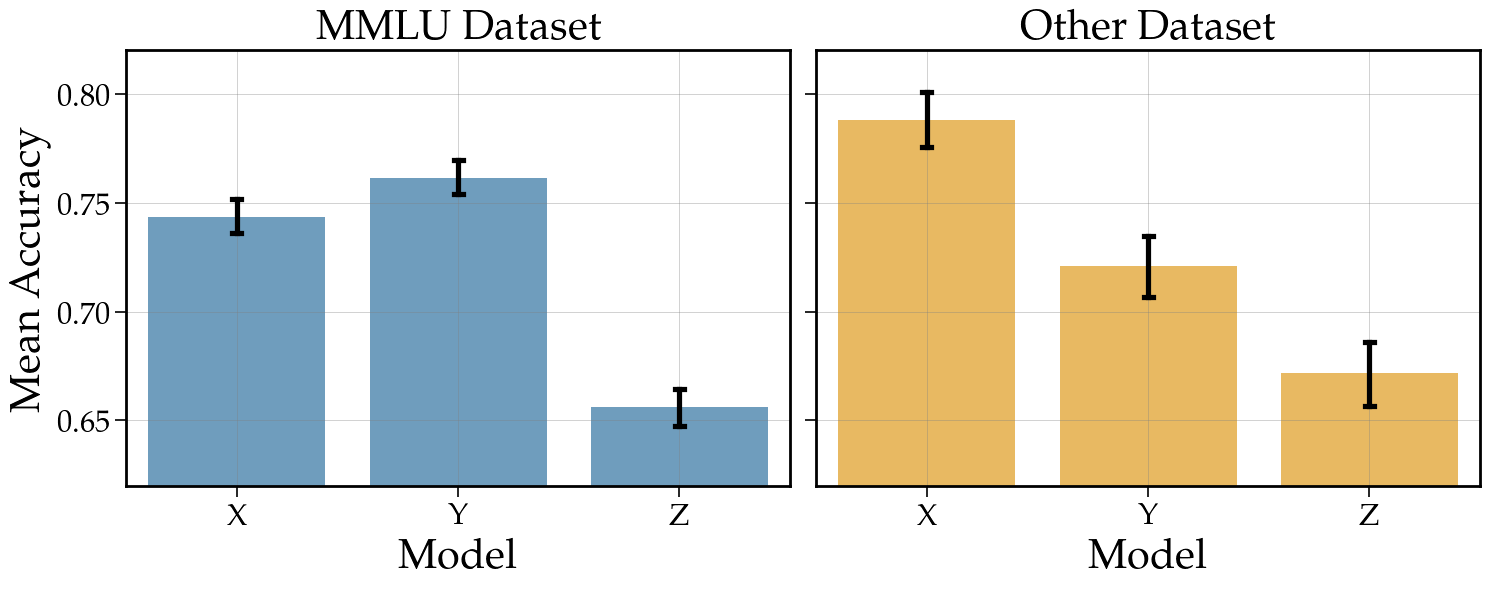

In [26]:
# Bar plot of the mean accuracy with 95% CI
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
sns.barplot(data=df_mmlu, 
            x="model_name", 
            y="correct", 
            ax=ax[0], 
            capsize=0.04, 
            err_kws={'color': 'black'}, 
            alpha=0.7, 
            errorbar=('ci', 95), 
            estimator='mean'
)
sns.barplot(data=df_other,
            x="model_name", 
            y="correct", 
            ax=ax[1], 
            capsize=0.04, 
            err_kws={'color': 'black'}, 
            alpha=0.7, 
            errorbar=('ci', 95), 
            estimator='mean',
            color="orange"
)
ax[0].set_title("MMLU Dataset")
ax[1].set_title("Other Dataset")
ax[0].set_xlabel("Model")
ax[1].set_xlabel("Model")
ax[0].set_ylabel("Mean Accuracy")
ax[0].grid(True, alpha=0.5)
ax[1].grid(True, alpha=0.5)

plt.ylim(0.62, 0.82) # To correctly see the error bars
plt.tight_layout()
plt.show()

**C**. 
- **Comments on LM Z performance:** From the bar plot, we can see that LM Z has the lowest mean accuracy on both datasets. The confidence interval of LM Z does not overlap with the other two models, which indicates that LM Z is the worst-performing model on these two specific datasets. 

- **Comments on LM X and LM Y:** LM Y outperforms LM X on the MMLU dataset by a small margin. However, on the other dataset, LM X outperforms LM Y. In both cases, the confidence intervals of LM X and LM Y do not overlap. 

### 2.2 (5 pt)

Ms. Sakota has assured you that both datasets contain questions of similar difficulty, so, what could be going on here?

A. What is the distribution of correct answers (A, B, C, D) for each dataset? Create a bar chart to visualize this.

B. Perform a chi-square test at $\alpha = 0.05$, of independence to determine if there's a significant difference in the distribution of correct answers between the two datasets. What do you conclude?

**hints**:
- for (A), keep in mind that df_mmlu and df_other contain the results of all models, i.e., the `question_id` column is duplicated.
- for (A), take care to clearly annotate the bar chart, e.g., title, y-label, legend.
- for (B), clearly state the null hypothesis and alternative hypothesis
- use the `chi2_contingency` function from `scipy.stats`
- format your results from answer (A) as a 2D array

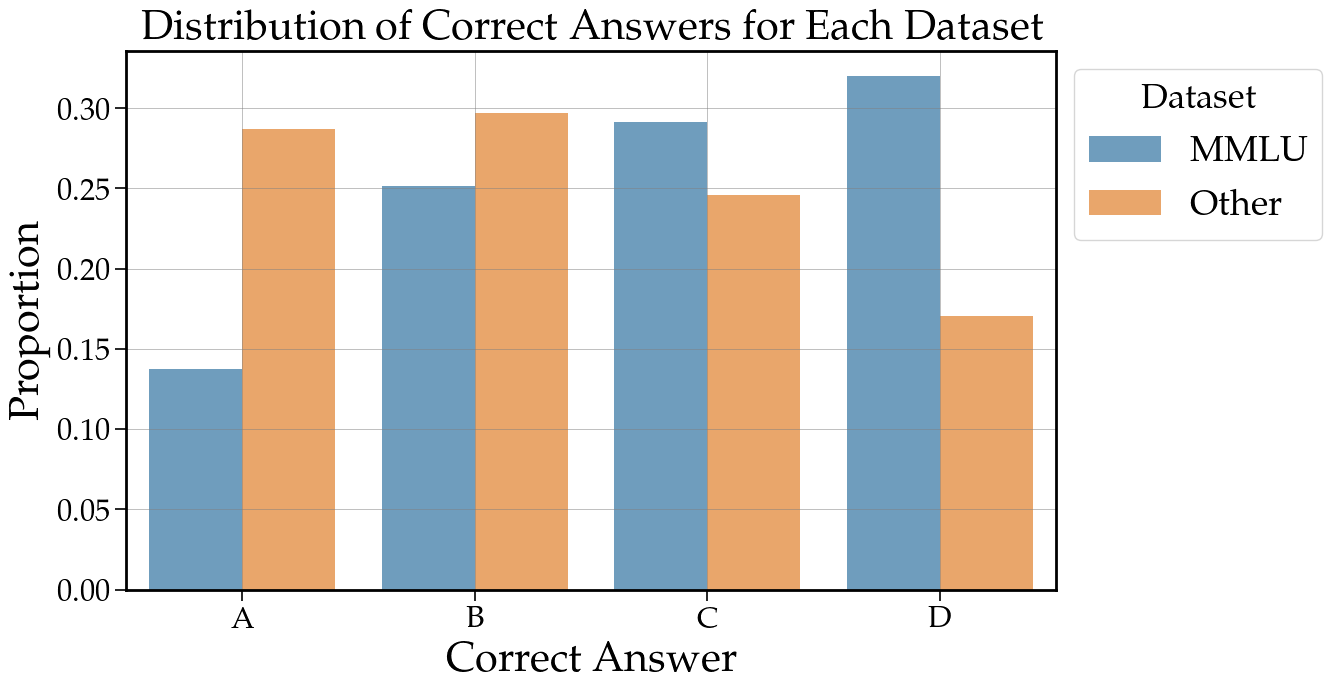

In [27]:
answers = sorted(df_mmlu['answer'].unique())

def compute_distribution(df, dataset_name):
    """
    Compute the distribution and frequency of correct answers for a given dataset
    """
    df_unique = df.drop_duplicates(subset='question_id')  
    distribution = df_unique['answer'].value_counts(normalize=True).reindex(answers).reset_index()   
    count = df_unique['answer'].value_counts().reindex(answers).reset_index()
    distribution['dataset'] = dataset_name
    count['dataset'] = dataset_name
    return distribution, count


# Compute the distribution of correct answers for each dataset and combine them
distribution_mmlu, count_mmlu = compute_distribution(df_mmlu, 'MMLU')
distribution_other, count_other = compute_distribution(df_other, 'Other')
df_distribution = pd.concat([distribution_mmlu, distribution_other])

df_count = pd.concat([count_mmlu, count_other]) # useful for chi-square test

plt.figure(figsize=(12, 7))
sns.barplot(data=df_distribution, x='answer', y='proportion', hue='dataset', order=answers, alpha=0.7)
plt.legend(title='Dataset', bbox_to_anchor=(1, 1), loc='upper left', title_fontsize='25')
plt.title("Distribution of Correct Answers for Each Dataset")
plt.xlabel("Correct Answer")
plt.ylabel("Proportion")
plt.grid(True, alpha=0.7)
plt.show()

In [28]:
from scipy.stats import chi2_contingency

# Null hypothesis: The distribution of correct answers is the same for both datasets
# Alternative hypothesis: The distribution of correct answers is different for both datasets

contingency_table = df_count.pivot(index='dataset', columns='answer', values='count')
results = chi2_contingency(contingency_table)

print("Chi-square test results:")
print(f"   - P-value: {results.pvalue:.2e}")

Chi-square test results:
   - P-value: 4.27e-136


**B**. The $p$-value of the chi-square test is $p\approx 4.27\cdot10^{-136}$. Since $p\ll 0.05$, we reject the null hypothesis, i.e. there is a significant difference in the distribution of correct answers between the two datasets.

### 2.3 (7 pt)

Let's dive in deeper:

A. What is language model X's mean accuracy conditioned on the four answer options for each dataset?

B. Compare LM X's performance when the correct answer is "A" between the two datasets. Use a T-test with CI = 0.95. What do you conclude?

C. Compare LM X's performance when the correct answer is "A" vs. "C or D" for each dataset. Use a T-test with CI = 0.95. What do you conclude?

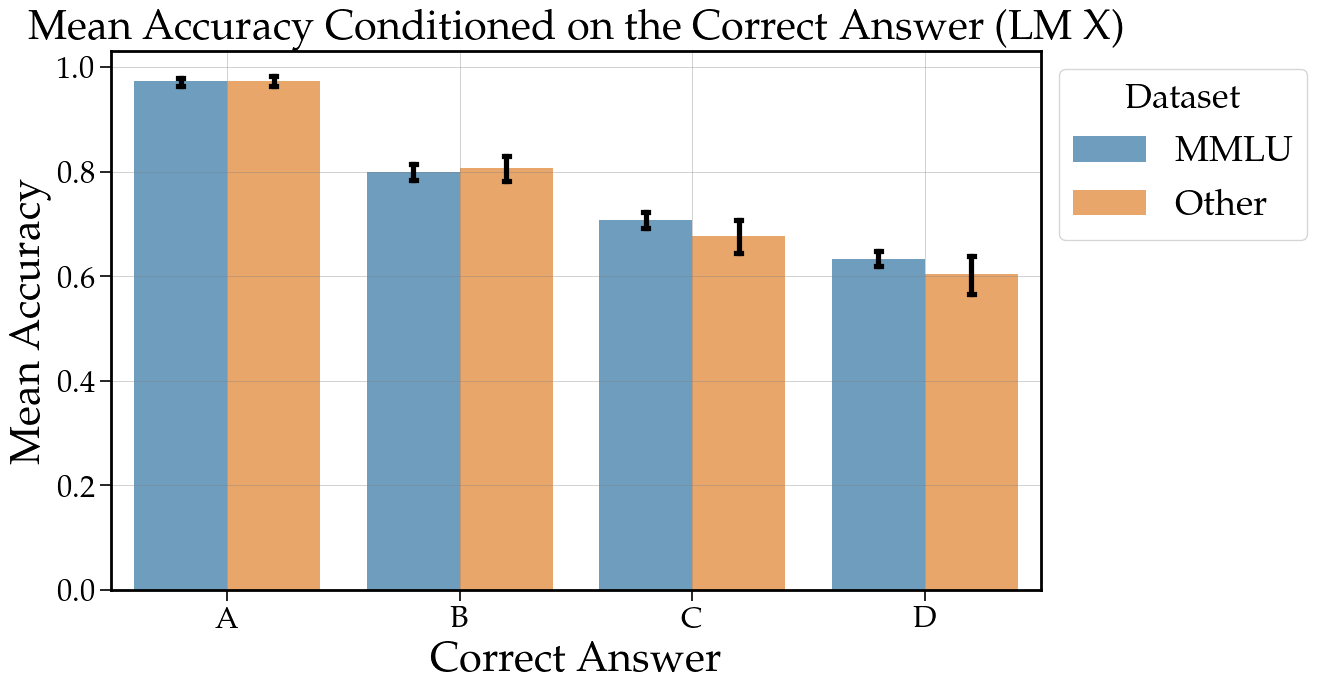

In [29]:
df_mmlu_x = df_mmlu.query("model_name == 'X'").copy()
df_mmlu_x['dataset'] = 'MMLU'
df_mmlu_x = df_mmlu_x[['answer', 'correct', 'dataset']]

df_other_x = df_other.query("model_name == 'X'").copy()
df_other_x['dataset'] = 'Other'
df_other_x = df_other_x[['answer', 'correct', 'dataset']]

df_x = pd.concat([df_mmlu_x, df_other_x])

plt.figure(figsize=(12, 7))
sns.barplot(data=df_x, 
            x='answer', 
            y='correct', 
            hue='dataset', 
            alpha=0.7, 
            palette='tab10', 
            err_kws={'color': 'black'}, 
            errorbar=('ci', 95), 
            estimator='mean', 
            capsize=0.04, 
            order=answers)
plt.title("Mean Accuracy Conditioned on the Correct Answer (LM X)")
plt.xlabel("Correct Answer")
plt.ylabel("Mean Accuracy")
plt.legend(title='Dataset', bbox_to_anchor=(1, 1), loc='upper left', title_fontsize='25')
plt.grid(True, alpha=0.5)
plt.show()

# # Here we can either compute the accuracies with the function or directly in the barplot 
# def compute_accuracy(df, dataset_name):
#     """
#     Compute the mean accuracy of a given LM conditioned on the correct answer for a given dataset
#     """
#     accuracy_list = []
#     for a in answers:
#         accuracy = df.query("answer == @a")['correct'].mean()
#         accuracy_list.append({
#             'answer': a,
#             'accuracy': accuracy,
#             'dataset': dataset_name
#         })
#     return pd.DataFrame(accuracy_list)
# accuracy_x_mmlu = compute_accuracy(df_mmlu_x, 'MMLU')
# accuracy_x_other = compute_accuracy(df_other_x, 'Other')
# accuracy_x = pd.concat([accuracy_x_mmlu, accuracy_x_other])
# plt.figure(figsize=(12, 7))
# sns.barplot(data=accuracy_x, x='answer', y='accuracy', hue='dataset', alpha=0.7, palette='tab10')
# plt.title("Mean Accuracy of LM X Conditioned on the Correct Answer")
# plt.xlabel("Correct Answer")
# plt.ylabel("Mean Accuracy")
# plt.grid(True, alpha=0.5)
# plt.legend(title='Dataset', bbox_to_anchor=(1, 1), loc='upper left', title_fontsize='25')
# plt.tight_layout()
# plt.show()

In [30]:
# T-test for LM X's performance when the correct answer is "A" between the two datasets
df_a = df_x.query("answer == 'A'")

df_a_mmlu = df_a.query("dataset == 'MMLU'")['correct']
df_a_other = df_a.query("dataset == 'Other'")['correct']
results = ttest_ind(df_a_mmlu, df_a_other)

print("T-test results for LM X's performance when the correct answer is 'A' between the two datasets:")
print(f"   - P-value: {results.pvalue:.2f}")

T-test results for LM X's performance when the correct answer is 'A' between the two datasets:
   - P-value: 0.83


**B**. The $p$-value of the t-test is $p\approx 0.83$. Since $p > 0.05$, we fail to reject the null hypothesis, i.e. **there is no significant difference in LM X's performance when the correct answer is "A" between the two datasets**.

In [31]:
# T-test for LM X's performance when the correct answer is "A" vs. "C or D" for each dataset
df_a = df_x.query("answer == 'A'")
df_c_d = df_x.query("answer == 'C' or answer == 'D'")

df_a_mmlu = df_a.query("dataset == 'MMLU'")['correct']
df_c_d_mmlu = df_c_d.query("dataset == 'MMLU'")['correct']
df_a_other = df_a.query("dataset == 'Other'")['correct']
df_c_d_other = df_c_d.query("dataset == 'Other'")['correct']

results_mmlu = ttest_ind(df_a_mmlu, df_c_d_mmlu)
results_other = ttest_ind(df_a_other, df_c_d_other)

print("T-test results for LM X's performance when the correct answer is 'A' vs. 'C or D' for each dataset:")
print(f"   - P-value for MMLU: {results_mmlu.pvalue:.2e}")
print(f"   - P-value for Other: {results_other.pvalue:.2e}")

T-test results for LM X's performance when the correct answer is 'A' vs. 'C or D' for each dataset:
   - P-value for MMLU: 5.33e-139
   - P-value for Other: 5.90e-96


**C.** In both cases, $p \ll 0.05$, which means we reject the null hypothesis, i.e., **there is a significant difference in LM X's performance when the correct answer is "A" vs. "C or D" for each dataset.**

### 2.4 (2 pt)

What an intriguing finding! 

A. Print the mean accuracies conditioned on the correct answer for all LMs for each dataset.

B. /Discuss:/ What do you observe?

In [32]:
df_mmlu_grouped = df_mmlu.groupby(["model_name", "answer"])["correct"].mean()
df_other_grouped = df_other.groupby(["model_name", "answer"])["correct"].mean()

In [33]:
df_mmlu_grouped

model_name  answer
X           A         0.972688
            B         0.799185
            C         0.707905
            D         0.633592
Y           A         0.623836
            B         0.688073
            C         0.733470
            D         0.904252
Z           A         0.643079
            B         0.641182
            C         0.669115
            D         0.661139
Name: correct, dtype: float64

In [34]:
df_other_grouped

model_name  answer
X           A         0.974026
            B         0.806452
            C         0.676407
            D         0.603744
Y           A         0.625232
            B         0.663978
            C         0.762987
            D         0.920437
Z           A         0.680891
            B         0.667563
            C         0.662338
            D         0.677067
Name: correct, dtype: float64

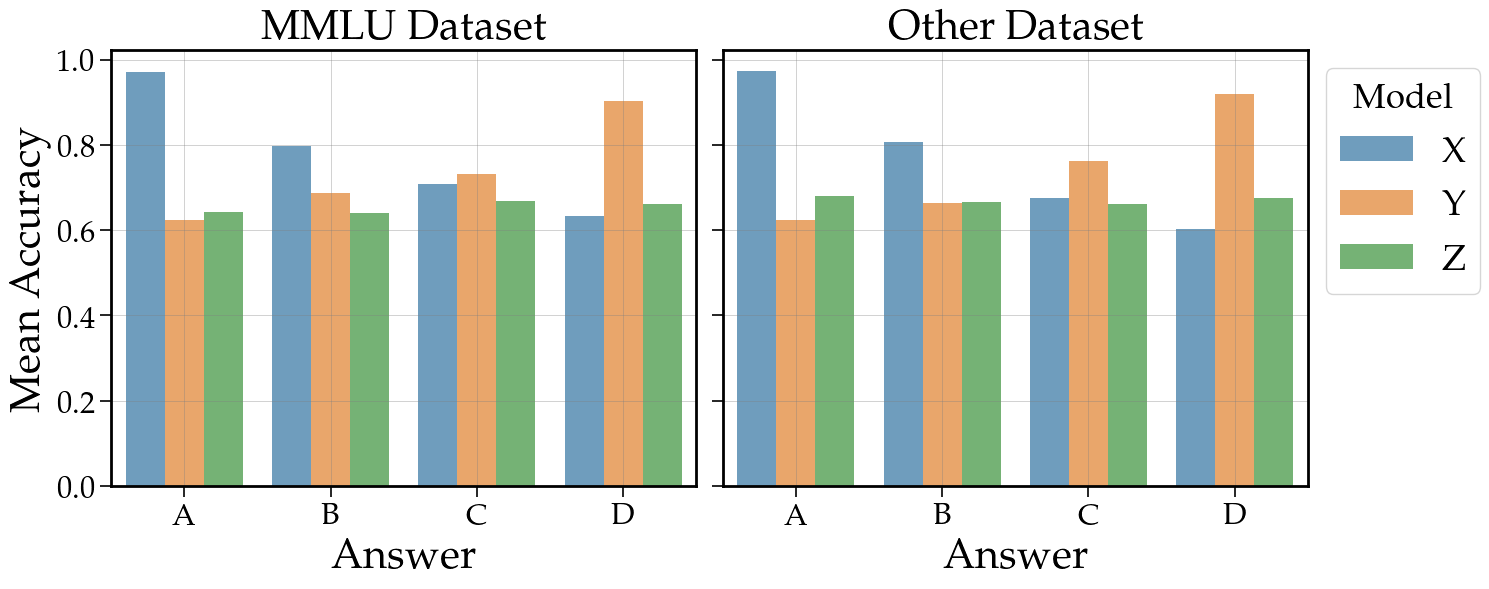

In [35]:
# Visually 
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
sns.barplot(data=df_mmlu_grouped.reset_index(), x="answer", y="correct", hue="model_name", ax=ax[0], alpha=0.7, palette='tab10')
sns.barplot(data=df_other_grouped.reset_index(), x="answer", y="correct", hue="model_name", ax=ax[1], alpha=0.7, palette='tab10')
ax[0].set_title("MMLU Dataset")
ax[1].set_title("Other Dataset")
ax[0].set_xlabel("Answer")
ax[1].set_xlabel("Answer")
ax[0].set_ylabel("Mean Accuracy")
ax[0].get_legend().remove()
ax[1].get_legend().remove()
ax[1].legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left', title_fontsize='25')
ax[0].grid(True, alpha=0.5)
ax[1].grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

**B.** 
- The accuracy of LM X follows the same pattern in both datasets: from best to worse it is $$\text{LM X:} \quad A > B > C > D$$ with similar accuracy values for both datasets. It **seems to be biased towards the answer "A"**.
- LM Y follows the opposite trend. On both datasets, it performs best when the correct answer is "D" and worst when the correct answer is "A": $$\text{LM Y:} \quad D > C > B > A$$ again, with similar accuracy values for both datasets. It **seems to be biased towards the answer "D"**.
- LM Z on the other hand is **more balanced** and **seems less biased** towards a specific answer. It achieves similar accuracy values for all answers on both datasets $$A\approx B \approx C \approx D,$$ but the accuracy is lower than for the other models.

### 2.5 (2 pt)

Concerned with your findings so far, you quickly consult with Ms. Sakota. After thinking it over, Ms. Sakota concludes that more tests are needed. She orders a second round of MMLU results. However, the clever Ms. Sakota thinks of the following twist: while keeping questions fixed, she randomly permutes the position of the correct answer. The new results can be found in the folder `data/task_2_5/`:
```
task_2_5/
│
└── lm_scores_mmlu_shuffle.csv
```

/Discuss:/ Why would Ms. Sakota do this?

**Answer.** Ms. Sakota probably wants to verify if LMs X and Y are indeed subject to a **positionnal bias**. By shuffling the position of the correct answer, she can check if the models are able to correctly answer the questions regardless of the position of the correct answer. If the models are indeed biased, we would expect a significant drop in performance when the position of the correct answer is shuffled.

### 2.6 (4 pt)

Increasingly sceptical of the language models' performance, you read up on proper testing practices. You stumble upon the concept of [test-rested stability](https://en.wikipedia.org/wiki/Repeatability), which roughtly states that:

"_Measurements taken by a single person or instrument on the same item, under the same conditions, and in a short period of time, should have the same results._"

In our case, we would assume an LM would have the same performance on a given question regardless of the correct answer position. One way of testing this is by using the following metric:

$$\text{test-retest metric} = \frac{1}{N}\sum_{i=1}^N \frac{1}{M}\sum_{j=1}^M c^i_0 c_j^i,$$

where $c^i_0 \in \{0, 1\}$ indicates whether the model answers the $i^{\text{th}}$ question correctly (1 if correct, 0 if incorrect). $c_j^i$ indicates whether the model answers the $i^{\text{th}}$ question correctly in the $j^{\text{th}}$ shuffled version of the answer label content. Finally, $M$ is the total number of shuffles and $N$ is the dataset size.

Task: compute the test-retest metric for each language model using the original `lm_scores_mmlu.csv` file and the new `lm_scores_mmlu_shuffle.csv` file. Using a bar plot, visualize your results by comparing the accuracy of the original `lm_scores_mmlu.csv` and the test-retest scores.

**hints**
- what is $M$ in our case?

(bonus: no points, but so much sweet, sweet knowledge - check out [the following article](https://arxiv.org/pdf/2406.19470v1))

In [36]:
def compute_test_retest_metric(df, df_shuffle):
    """
    Compute the test-retest metric for each language model
    """
    test_retest_metrics = []
    model_names = df['model_name'].unique()
    for model in model_names: 
        df_model = df.query("model_name == @model")
        df_model_shuffle = df_shuffle.query("model_name == @model")
        test_retest_metric = np.mean((df_model['correct'] == True) & (df_model['correct'] == df_model_shuffle['correct']))
        test_retest_metrics.append({
            'model_name': model,
            'test_retest_metric': test_retest_metric
        })
    return pd.DataFrame(test_retest_metrics)

df_mmlu_shuffle = pd.read_csv('task_2_5/lm_scores_mmlu_shuffle.csv')
test_retest_metrics = compute_test_retest_metric(df_mmlu, df_mmlu_shuffle)
test_retest_metrics

,model_name,test_retest_metric
0,X,0.588406
1,Y,0.571648
2,Z,0.441604


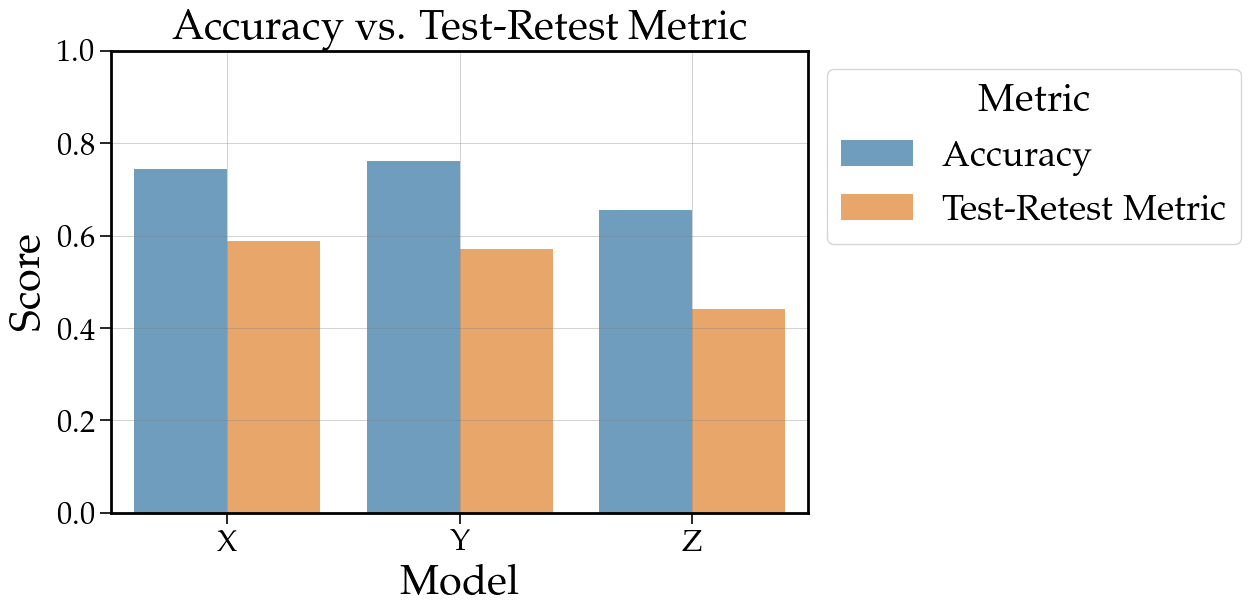

In [37]:
# Add the test_retest_metric to the original dataframe 
df_mmlu_test_retest = pd.merge(df_mmlu, test_retest_metrics, on='model_name')
df_metrics = df_mmlu_test_retest.groupby('model_name')[['correct', 'test_retest_metric']].mean().reset_index()
df_melted = df_metrics.melt(id_vars='model_name', value_vars=['correct', 'test_retest_metric'], var_name='Metric', value_name='Score')

# Rename the metrics
df_melted['Metric'] = df_melted['Metric'].map({
    'correct': 'Accuracy',
    'test_retest_metric': 'Test-Retest Metric'
})

plt.figure(figsize=(9, 6))
sns.barplot(data=df_melted, x='model_name', y='Score', hue='Metric', palette='tab10', alpha=0.7)
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Accuracy vs. Test-Retest Metric")
plt.legend(title='Metric', bbox_to_anchor=(1, 1), loc='upper left', title_fontsize='28')
plt.ylim(0, 1)
plt.grid(True, alpha=0.5)
plt.show()

### 2.7 (2 pt)

A. Using the unshuffled data: For each LM, print the distribution of the answers they give as well as the accuracy conditioned on the answer they give.

B. /Discuss:/ Describe what you observe

[bonus: not scored, but again _that sweet, sweet knowledge_] Could you think of a plausible explanation?

In [38]:
total_number_of_questions = len(df_mmlu['question_id'].unique())  # Number of questions for each LM

stats = df_mmlu.groupby(['model_name', 'result'])['correct'].agg(['mean', 'count'])
stats['count'] = stats['count'] / total_number_of_questions
stats = stats.rename(columns={'count': 'proportion'})
stats

mean  proportion
model_name result                      
X          A       0.367927    0.364142
           B       0.884543    0.227343
           C       1.000000    0.205968
           D       1.000000    0.202548
Y          A       0.937500    0.091655
           B       0.897606    0.192886
           C       0.827861    0.257780
           D       0.631608    0.457678
Z          A       0.476103    0.186047
           B       0.654073    0.246666
           C       0.703429    0.276761
           D       0.727487    0.290527

In [39]:
models = sorted(df_mmlu['model_name'].unique())
answers = sorted(df_mmlu['result'].unique())

print("Distribution of the answers given by each model:")
for model in models:
    print(f"\nModel {model} answers:")
    for answer in answers:
        if answer in stats.loc[model].index:
            print(f"    - '{answer}' {stats.loc[model, answer]['proportion']*100:.1f}% of the time. "
                  f"When it does, it is correct {stats.loc[model, answer]['mean']*100:.1f}% of the time.")

Distribution of the answers given by each model:

Model X answers:
    - 'A' 36.4% of the time. When it does, it is correct 36.8% of the time.
    - 'B' 22.7% of the time. When it does, it is correct 88.5% of the time.
    - 'C' 20.6% of the time. When it does, it is correct 100.0% of the time.
    - 'D' 20.3% of the time. When it does, it is correct 100.0% of the time.

Model Y answers:
    - 'A' 9.2% of the time. When it does, it is correct 93.8% of the time.
    - 'B' 19.3% of the time. When it does, it is correct 89.8% of the time.
    - 'C' 25.8% of the time. When it does, it is correct 82.8% of the time.
    - 'D' 45.8% of the time. When it does, it is correct 63.2% of the time.

Model Z answers:
    - 'A' 18.6% of the time. When it does, it is correct 47.6% of the time.
    - 'B' 24.7% of the time. When it does, it is correct 65.4% of the time.
    - 'C' 27.7% of the time. When it does, it is correct 70.3% of the time.
    - 'D' 29.1% of the time. When it does, it is correct 72.

**B.** 
- For LM X, it is interesting to note that it "attempts" answering "A" the most, but is not successful in answering it correctly. Remarkably, when answering "C" and "D", it is always correct. This might indicate that when the LM struggles in finding the correct answer, it defaults to "A" (this may be based on the training data). 
- LM Y and Z don't reach a 100% accuracy on any of the answers, but they are more balanced in their distribution of answers and their accuracy. The "worst performing answer" for model Y (resp. Z) is "D" (resp. "A") with a success rate of around 63.2% (resp. 47.6%) which is almost double the success rate of model X for its worst performing answer. 

## Task 3 (16 points): What do Questions and Answers look like for a Language Model?

While you feel pretty good about the tests you conducted so far, something still bothers you: what if the language models don't see the data like you do? Suddenly, you receive a phone call from a wise AI sage in the West, _Westoda_:


>"Hmm, correct you are, young padawan, to question how the world is seen by large language models! Simple 'text' it is not, hmm? No, no, no! Characters and words, the way of puny humans, this is not, heh heh heh.

>'Tokens', they use, yes! Mysterious and powerful, these tokens are. Expand our vocabulary, they do, beyond the simple 'a to Z'. Chunky blocks of text, they become, yes! 'Hello world', a simple phrase it may seem. But to a language model, '[24912, 2375]' it might appear, yes! Confusing, it is, hmm?

>Wise, it would be, to explore these MMLU data points through the eyes of a language model, you think? Yes, yes! Much to learn, there is. The ways of the tokens, understand you must, if truly comprehend the great LMs, you wish to.

>Meditate on this, you should. The force of natural language processing, strong it is. But patience, you must have, my young padawan. For only through great study and contemplation, will the mysteries of the tokens reveal themselves to you, they will. Yes, hmmm!"


Admittingly, Westoda at times speaks in riddles… However, he was explaining a crucial aspect of modern LMs called [Tokenization](https://learn.microsoft.com/en-us/dotnet/ai/conceptual/understanding-tokens):


“Tokens are words, character sets, or combinations of words and punctuation that are used by [language models (LMs)] to decompose text into. Tokenization is the first step in training”

Instead of characters, LMs process natural language using “tokens”. While this is useful for a number of reasons, it does at times introduce some “unintuitive” behavior…

In [40]:
# PROVIDED CODE
try:
    import tiktoken
except Exception as e:
    print('installing tiktoken package')
    
    !pip install tiktoken
    
    import tiktoken

def tokenize_text(s):
    enc = tiktoken.encoding_for_model('gpt-4o')
    tokens = enc.encode(str(s))
    return tokens

example_string = 'hello world'
print(f'humans see: "{example_string}" --> language models see: {tokenize_text(example_string)}')

humans see: "hello world" --> language models see: [24912, 2375]


### 3.1 (5 pt)

Use the provided code in the cell above to "see the world through the eyes of a language model":

A. Tokenize the questions of the original MMLU data provided in task 1: `task_1/mmlu_data/test.csv` and plot the token distribution (the frequency of each token).

B. Same as (A), but now for the answers in columns (columns "A", "B", "C", and "D").

C. Isolate the tokens for the strings "A", "B", "C", and "D", then, for their occurances in both questions and answers, print their relative distribution to each other.

**hint**
- There are a _lot_ of tokens, consider using a cutoff point and log scale
- For (c), they should sum to 1

In [41]:
# Tokenizing the questions
df_mmlu_test = pd.read_csv('task_1/mmlu_data/test.csv')
df_mmlu_test['tokenized_question'] = df_mmlu_test['question'].apply(tokenize_text)
df_mmlu_test[['question', 'tokenized_question']].head()

,question,tokenized_question
0,Find the degree for the given field extension ...,"[11437, 290, 9882, 395, 290, 4335, 3259, 15369..."
1,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...","[12845, 275, 314, 350, 16, 11, 220, 17, 11, 22..."
2,Find all zeros in the indicated finite field o...,"[11437, 722, 42274, 306, 290, 26832, 73104, 32..."
3,Statement 1 | A factor group of a non-Abelian ...,"[9900, 220, 16, 1022, 355, 12332, 3566, 328, 2..."
4,Find the product of the given polynomials in t...,"[11437, 290, 1888, 328, 290, 4335, 1823, 17403..."


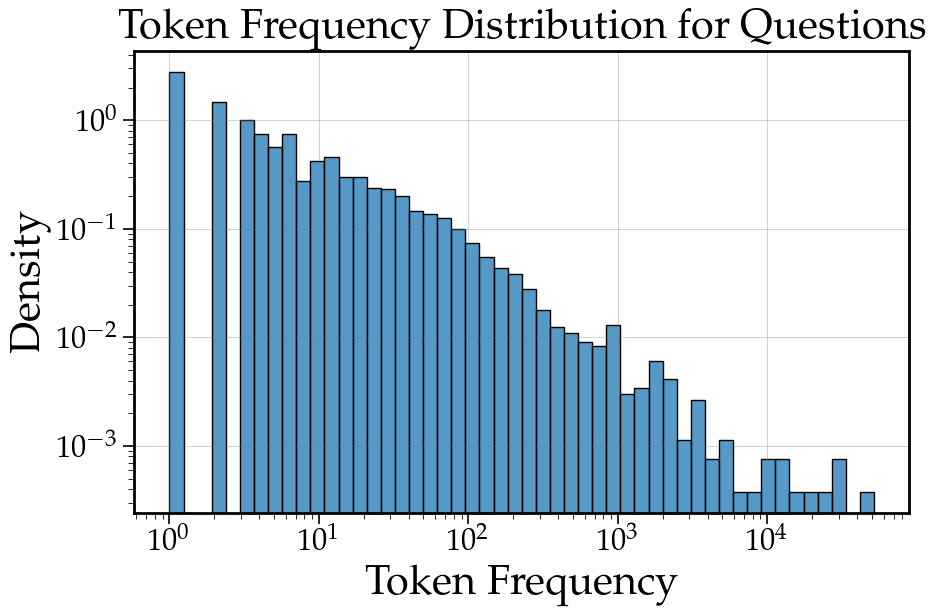

In [42]:
# Plotting the token distribution for the questions
tokens = df_mmlu_test['tokenized_question'].explode()
token_counts_question = tokens.value_counts()

plt.figure(figsize=(10, 6))
sns.histplot(token_counts_question, log_scale=True, stat='density', bins=50)
plt.title("Token Frequency Distribution for Questions")
plt.xlabel("Token Frequency")
plt.ylabel("Density")
plt.xscale('log')
plt.yscale('log')
plt.grid(True, alpha=0.5)
plt.show()

In [43]:
# Tokenizing the answers
answers = sorted(df_mmlu_test['answer'].unique())
for answer in answers: 
    df_mmlu_test[f'tokenized_{answer}'] = df_mmlu_test[answer].apply(tokenize_text)

df_mmlu_test[['A', 'tokenized_A', 'B', 'tokenized_B', 'C', 'tokenized_C', 'D', 'tokenized_D']].head()

,A,tokenized_A,B,tokenized_B,C,tokenized_C,D,tokenized_D
0,0,[15],4,[19],2,[17],6,[21]
1,8,[23],2,[17],24,[1494],120,[6106]
2,0,[15],1,[16],"0,1","[15, 11, 16]","0,4","[15, 11, 19]"
3,"True, True","[4710, 11, 6432]","False, False","[8168, 11, 7983]","True, False","[4710, 11, 7983]","False, True","[8168, 11, 6432]"
4,2x^2 + 5,"[17, 87, 61, 17, 659, 220, 20]",6x^2 + 4x + 6,"[21, 87, 61, 17, 659, 220, 19, 87, 659, 220, 21]",0,[15],x^2 + 1,"[87, 61, 17, 659, 220, 16]"


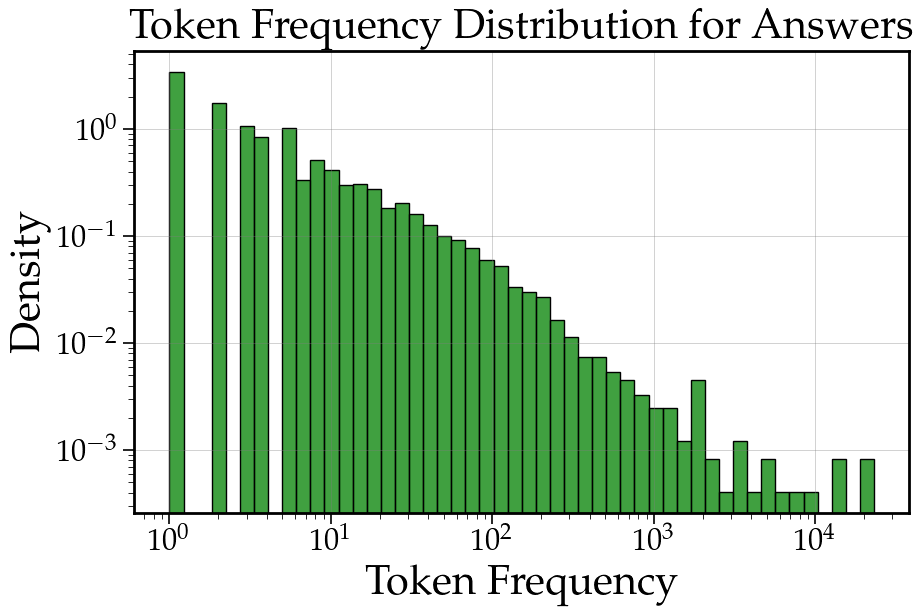

In [44]:
# Consider the tokenization of all answers 
tokens_answer = pd.concat([df_mmlu_test['tokenized_A'], df_mmlu_test['tokenized_B'], df_mmlu_test['tokenized_C'], df_mmlu_test['tokenized_D']]).explode()
token_counts_answer = tokens_answer.value_counts()

plt.figure(figsize=(10, 6))
sns.histplot(token_counts_answer, log_scale=True, stat='density', bins=50, color='green')
plt.title("Token Frequency Distribution for Answers")
plt.xlabel("Token Frequency")
plt.ylabel("Density")
plt.xscale('log')
plt.yscale('log')
plt.grid(True, alpha=0.5)
plt.show()

In [45]:
answers = sorted(df_mmlu_test['answer'].unique())
target_tokens = [tokenize_text(answer)[0] for answer in answers] 

# Filter the target tokens
target_token_counts_question = token_counts_question.loc[target_tokens]
target_token_counts_answer = token_counts_answer.loc[target_tokens]

# Compute the relative distribution
relative_distribution_question = target_token_counts_question / target_token_counts_question.sum()
relative_distribution_answer = target_token_counts_answer / target_token_counts_answer.sum()

print("Relative Distribution of Tokens 'A', 'B', 'C', and 'D' for Questions:")
for i, answer in enumerate(answers):
    print(f"    - '{answer}': {relative_distribution_question.iloc[i]*100:.2f}%")

print("\nRelative Distribution of Tokens 'A', 'B', 'C', and 'D' for Answers:")
for i, answer in enumerate(answers):
    print(f"    - '{answer}': {relative_distribution_answer.iloc[i]*100:.2f}%")

Relative Distribution of Tokens 'A', 'B', 'C', and 'D' for Questions:
    - 'A': 90.55%
    - 'B': 3.19%
    - 'C': 4.17%
    - 'D': 2.09%

Relative Distribution of Tokens 'A', 'B', 'C', and 'D' for Answers:
    - 'A': 63.18%
    - 'B': 9.99%
    - 'C': 18.55%
    - 'D': 8.27%


In [46]:
# Check if the relative distributions sum to 1
print(f"Sum of the relative distribution for questions: {relative_distribution_question.sum()}")
print(f"Sum of the relative distribution for answers: {relative_distribution_answer.sum()}")

Sum of the relative distribution for questions: 1.0
Sum of the relative distribution for answers: 1.0


### 3.2 (3 pt)

What if the number of "A", "B", "C", and "D" tokens in the question and answer pairs could influence a language model's decisions?

A. For each combined question-answers pair, compute: 
1. the number of "A", "B", "C", and "D" tokens; and
2. the total number of tokens.
3. then, group by the "correct" answer and compute the mean frequency of A, B, C, and D tokens and the total number of tokens. 
4. finally, print your results

B. /Discuss:/ What do you think of the hypothesis that the frequency of A, B, C, and D tokens could influence answers?


In [47]:
# Concatenate tokens from questions and answers for each question
df_qa_pairs = df_mmlu_test.copy()
df_qa_pairs['tokenized_qa'] = df_qa_pairs.apply(lambda x: x['tokenized_question'] + x['tokenized_A'] + 
                                                          x['tokenized_B'] + x['tokenized_C'] + x['tokenized_D'], axis=1)

# Count the number of A, B, C, and D tokens for each question-answer pair
df_qa_pairs['num_A'] = df_qa_pairs['tokenized_qa'].apply(lambda x: x.count(tokenize_text('A')[0]))
df_qa_pairs['num_B'] = df_qa_pairs['tokenized_qa'].apply(lambda x: x.count(tokenize_text('B')[0]))
df_qa_pairs['num_C'] = df_qa_pairs['tokenized_qa'].apply(lambda x: x.count(tokenize_text('C')[0]))
df_qa_pairs['num_D'] = df_qa_pairs['tokenized_qa'].apply(lambda x: x.count(tokenize_text('D')[0]))

# Total number of tokens for each question-answer pair
df_qa_pairs['total_tokens'] = df_qa_pairs['tokenized_qa'].apply(len)

# Group by the correct answer and compute the mean frequency of A, B, C, and D tokens and the total number of tokens
df_qa_pairs_grouped = df_qa_pairs.groupby('answer')[['num_A', 'num_B', 'num_C', 'num_D', 'total_tokens']].mean()
df_qa_pairs_grouped

,num_A,num_B,num_C,num_D,total_tokens
answer,,,,,
A,0.243017,0.018932,0.025140,0.013035,93.208566
B,0.231947,0.019642,0.029463,0.012709,88.863951
C,0.226410,0.018984,0.034897,0.015355,92.675879
D,0.242850,0.014566,0.030985,0.014301,92.132415


B. /Discuss:/

### 3.3 (4 pt)

Three of the most important considerations when deciding between language models are:

Quality
Costs
Speed

So far, much of your analysis has focused on quality. However, the government has indicated that they are quite concerned about both the total costs and speed as well. Specifically, it has been brought to their attention that a new `turbo` model has been launched! 

This model is both cheaper and faster than the models you evaluated so far. However, there is a catch: the context length* is much smaller than that of the other LMS. Namely, it can only process **300** tokens during inference. Meanwhile, the other models can process up to 100K tokens! 

*_The “context length” refers to the number of tokens that can be given to an LM as input._

A. Are there subjects where using the cheaper model might be problematic? I.e., where part of the question and answer(s) might not fit completely in the context?

B. /Discuss:/ Can you think of a strategy that would balance the needs of the government?

**hint**:
- An LM needs to have both the question and the different answer options in its context

Median question-answer pair length: 59.0
The 95.4 percentile question-answer pair length: 300.0


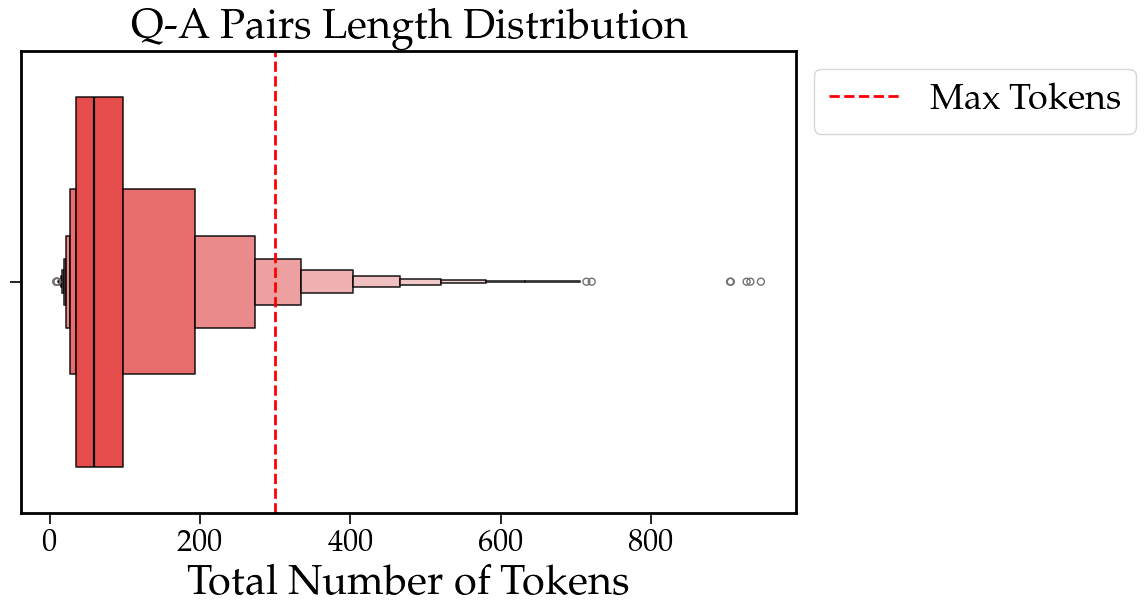

In [48]:
# Let's first look at the length distribution of the Q-A pairs
MAX_TOKENS = 300

print(f"Median question-answer pair length: {df_qa_pairs['total_tokens'].median()}")
print(f"The 95.4 percentile question-answer pair length: {df_qa_pairs['total_tokens'].quantile(0.954)}")

plt.figure(figsize=(10, 6))
sns.boxenplot(x='total_tokens', data=df_qa_pairs, color='red', linecolor='black', alpha=0.8)
plt.axvline(x=MAX_TOKENS, color='red', linestyle='--', label='Max Tokens', linewidth=2)
plt.xlabel("Total Number of Tokens")
plt.title("Q-A Pairs Length Distribution")
# plt.xscale('log')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

**A.** In the boxplot, we can see that the majority ($\approx 95\%$) of the Q-A pairs have a total number of tokens below 300. However, there are some outliers that exceed this limit. For these pairs, using the `turbo` model might be problematic as part of the question and answer(s) might not fit completely in the context. Let's investigate a bit further to see if some subjects are more likely to have longer Q-A pairs.

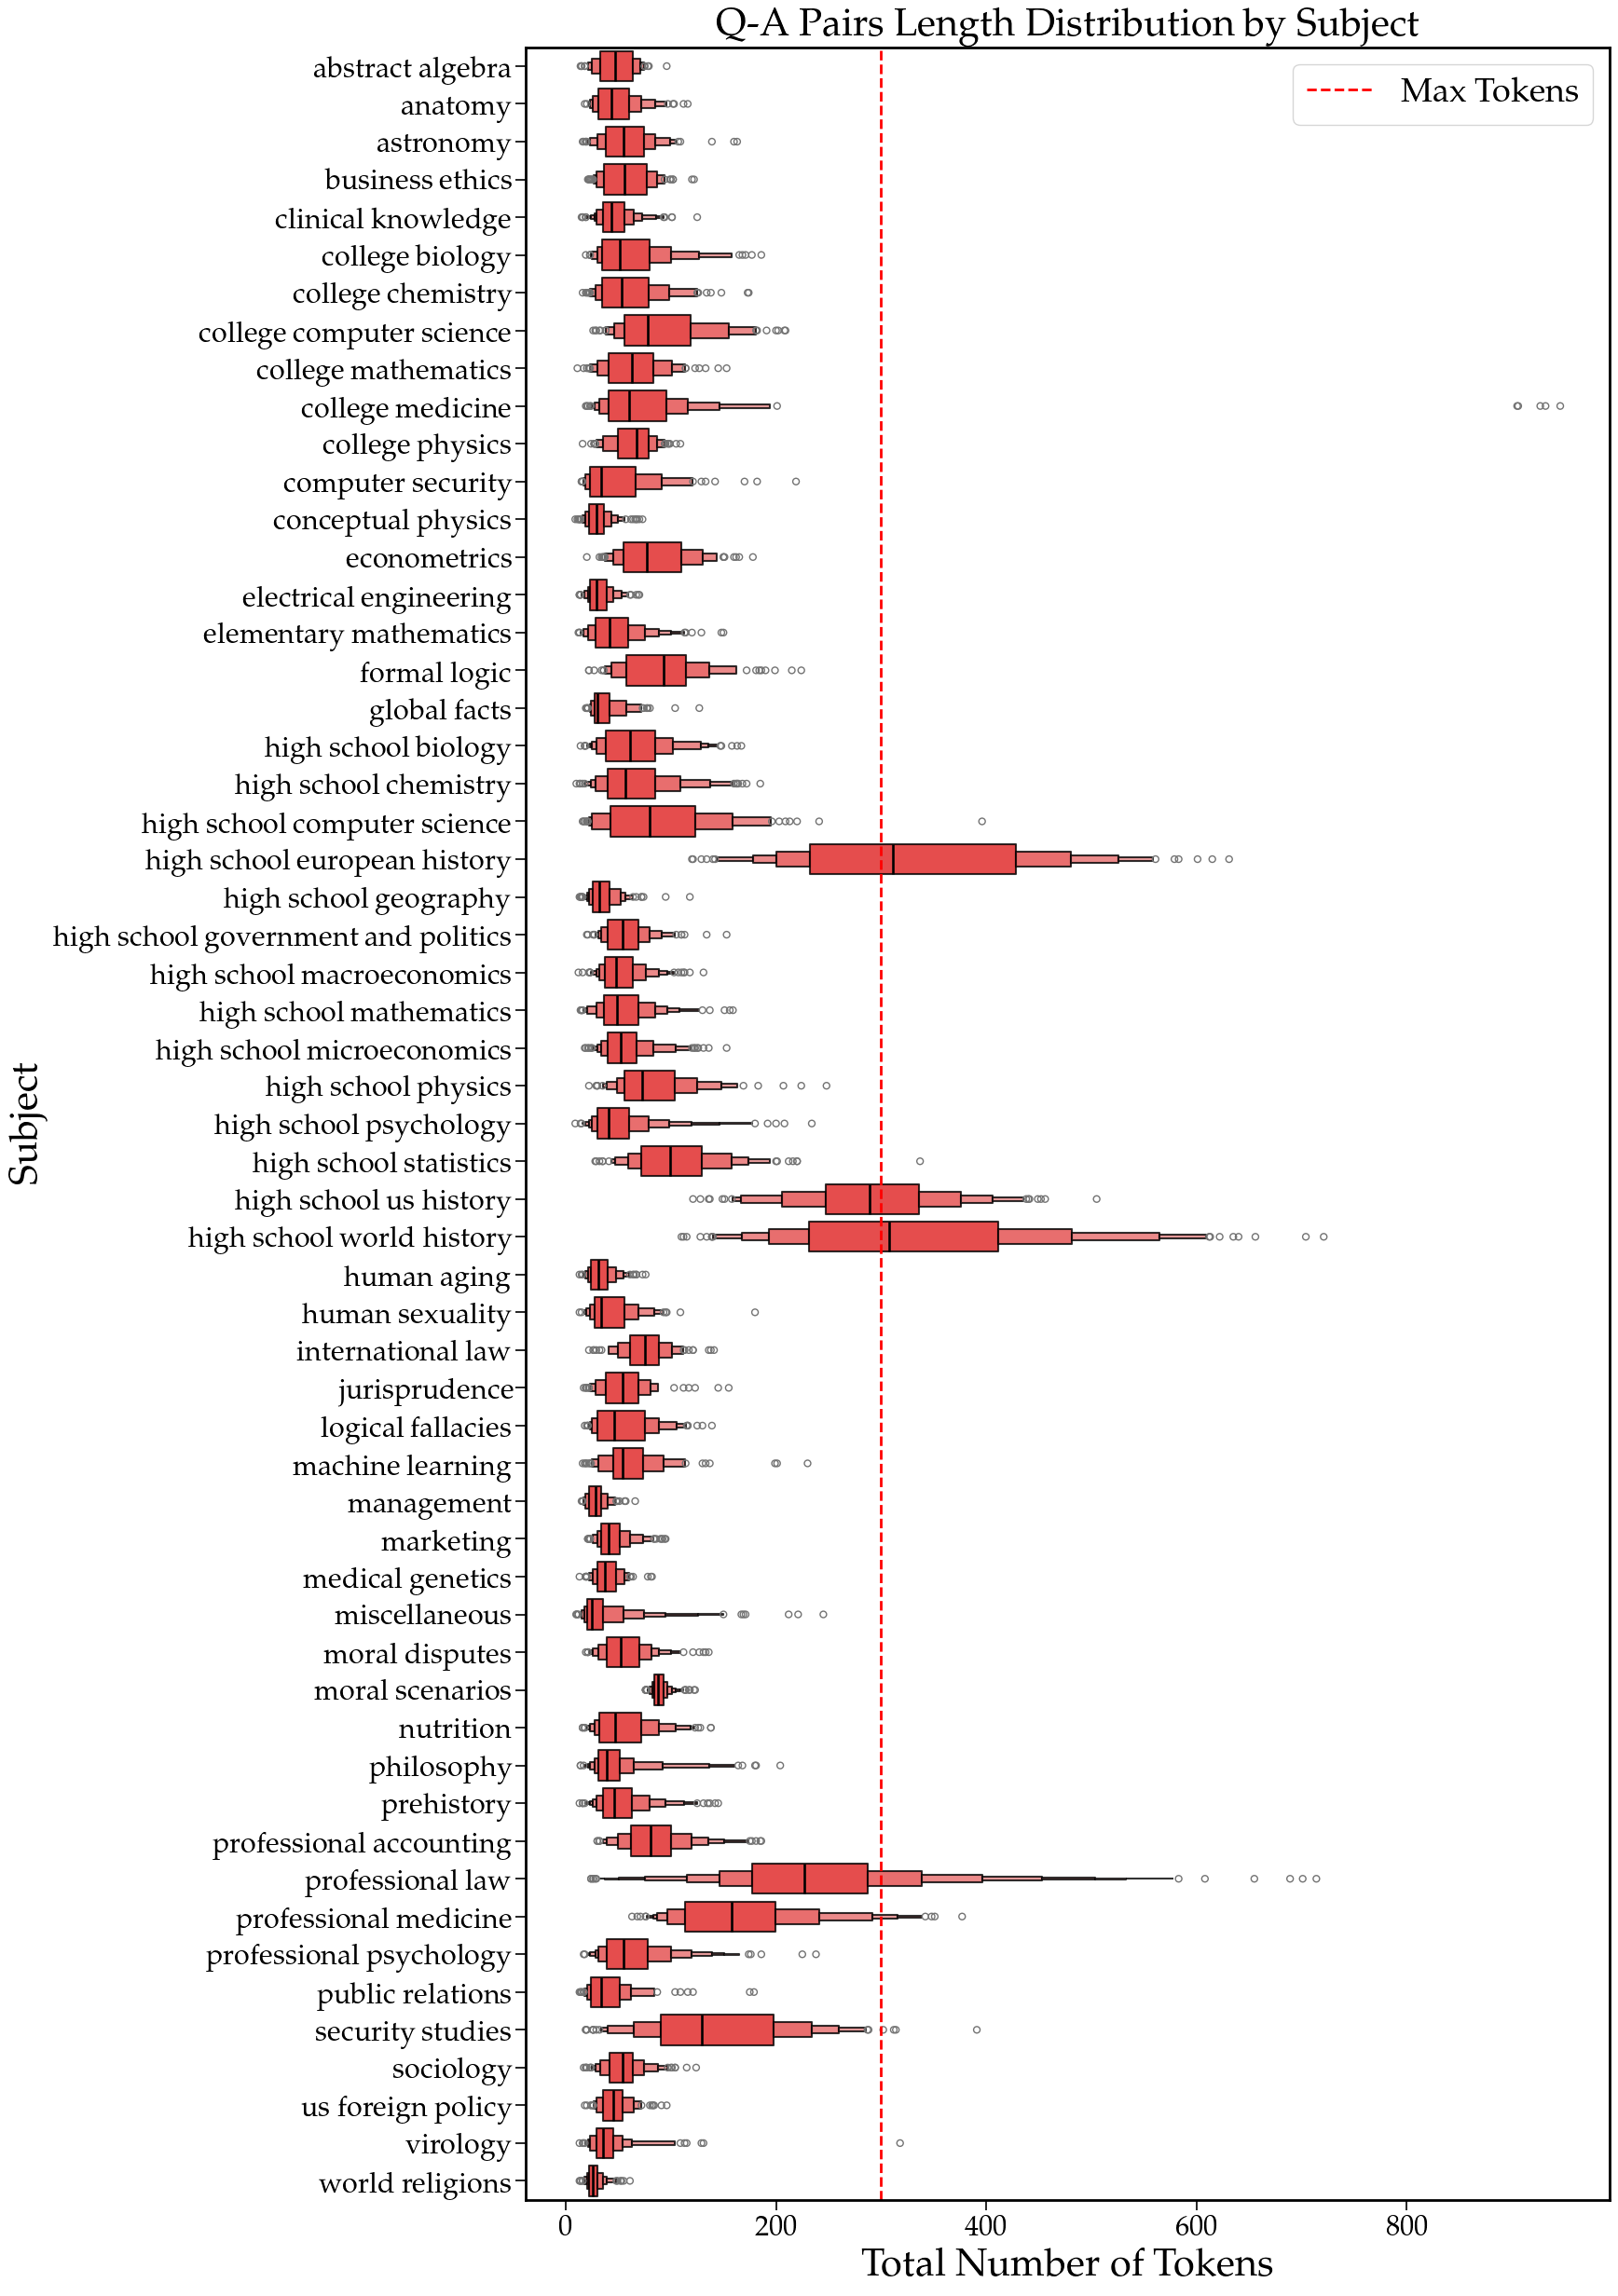

In [49]:
# Investigating the subjects with the longest Q-A pairs using box-plots
plt.figure(figsize=(15, 30))
sns.boxenplot(x='total_tokens', y='subject', data=df_qa_pairs, linewidth=1.5, linecolor='black', color='red', alpha=0.8)
plt.axvline(x=MAX_TOKENS, color='red', linestyle='--', label='Max Tokens', linewidth=2)
plt.xlabel("Total Number of Tokens")
plt.ylabel("Subject")
plt.title("Q-A Pairs Length Distribution by Subject")
plt.legend()
plt.show()

**A.** 
- Now we see that for most subjects, we can simply remove the outliers ($n_{\text{token}} > 300$) without loosing too much information. 
- However, for the subjects "**High School European History**", "**High-School US History**", "**High School World History**" and "**Professional Law**", there is a non negligible fraction of Q-A pairs that exceed the 300 tokens limit. For these subjects, using the `turbo` model might be problematic.

**B.** 
- The simplest approach would be to use the turbo model for all subjects except for the ones where the Q-A pairs often exceed the 300 tokens limit. For these subjects, we could use the more expensive model with a higher context length. 

### 3.4 (4 pt)

/Discuss:/ The time has come to give your final recommendation on the use of LMs in education to the government! Taking into account everything you analyzed in all the preceding tasks (1, 2, and 3), please write a short recommendation consisting of 4 bullet points discussing your concerns.

**hint**
- Try to use the MECE framework: _Mutually Exclusive Collectively Exhaustive_

/Discuss:/
1. 

2. 

3. 

4. 